## 1. 準備

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
#import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [2]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")
print(train_df.shape)
display(train_df.head())
print(test_df.shape)
display(test_df.head())

(850, 11)


,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,69,Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,65,Male,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0


(350, 10)


,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,25,Male,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006
1,26,Female,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562
2,64,Male,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579
3,65,Male,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070
4,34,Female,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078


## データの確認

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
display(train_df.describe())
display(test_df.describe())

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,46.610588,1.607337,0.606737,272.211316,41.978476,61.018120,7.032290,3.517458,1.144570,0.444706
std,16.453672,2.443585,1.569032,200.348515,145.927366,110.125390,0.840664,0.559942,0.227237,0.497226
min,10.000000,0.585961,0.034861,163.261838,3.924518,11.283497,4.858679,2.180884,0.627133,0.000000
25%,32.000000,0.781258,0.144889,213.991414,13.644658,21.239157,6.730612,3.139153,1.004466,0.000000
50%,48.000000,0.835591,0.194085,220.092503,16.638001,27.056026,6.915580,3.621339,1.205016,0.000000
75%,62.000000,1.196759,0.335447,229.455927,23.056081,56.461568,7.536151,3.712524,1.287880,1.000000
max,78.000000,23.017027,17.692164,2108.483728,1423.186473,814.439397,8.739000,5.016970,1.821496,1.000000


,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,46.702857,1.631854,0.566151,282.234056,32.363521,61.545428,7.089375,3.561579,1.154658
std,16.166318,2.857160,1.746409,201.307440,83.888397,114.916494,0.877987,0.607376,0.248094
min,6.000000,0.610073,0.053853,175.747532,7.862773,11.278741,4.970108,2.296308,0.668751
25%,32.000000,0.787081,0.147714,214.211425,13.551174,20.842910,6.725417,3.128234,1.008996
50%,48.000000,0.845039,0.193881,220.738618,16.449139,25.971274,6.931101,3.620933,1.216902
75%,61.000000,0.973743,0.236440,231.839764,22.760056,52.746083,7.553500,3.738682,1.287962
max,75.000000,27.050317,17.707907,2101.145760,860.919043,705.777170,8.752045,5.009589,1.805157


In [8]:
print(train_df.info())
print("==="*30)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       850 non-null    int64  
 1   Gender    850 non-null    object 
 2   T_Bil     850 non-null    float64
 3   D_Bil     850 non-null    float64
 4   ALP       850 non-null    float64
 5   ALT_GPT   850 non-null    float64
 6   AST_GOT   850 non-null    float64
 7   TP        850 non-null    float64
 8   Alb       850 non-null    float64
 9   AG_ratio  850 non-null    float64
 10  disease   850 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 73.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       350 non-null    int64  
 1   Gender    350 non-null    object 
 2   T_Bil     350 non-null    float64
 3   D_Bil     350 n

In [30]:
# カテゴリカル変数 Gender の One-Hot エンコーディングを行う
train_df = pd.get_dummies(train_df, columns=['Gender']).iloc[:, :-1]
test_df = pd.get_dummies(test_df, columns=['Gender']).iloc[:, :-1]

In [31]:
columns = train_df.columns.tolist()
# columns.remove("Gender")
# columns.remove("disease")
print(columns)

['Age', 'T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb', 'AG_ratio', 'disease', 'Gender_Female']


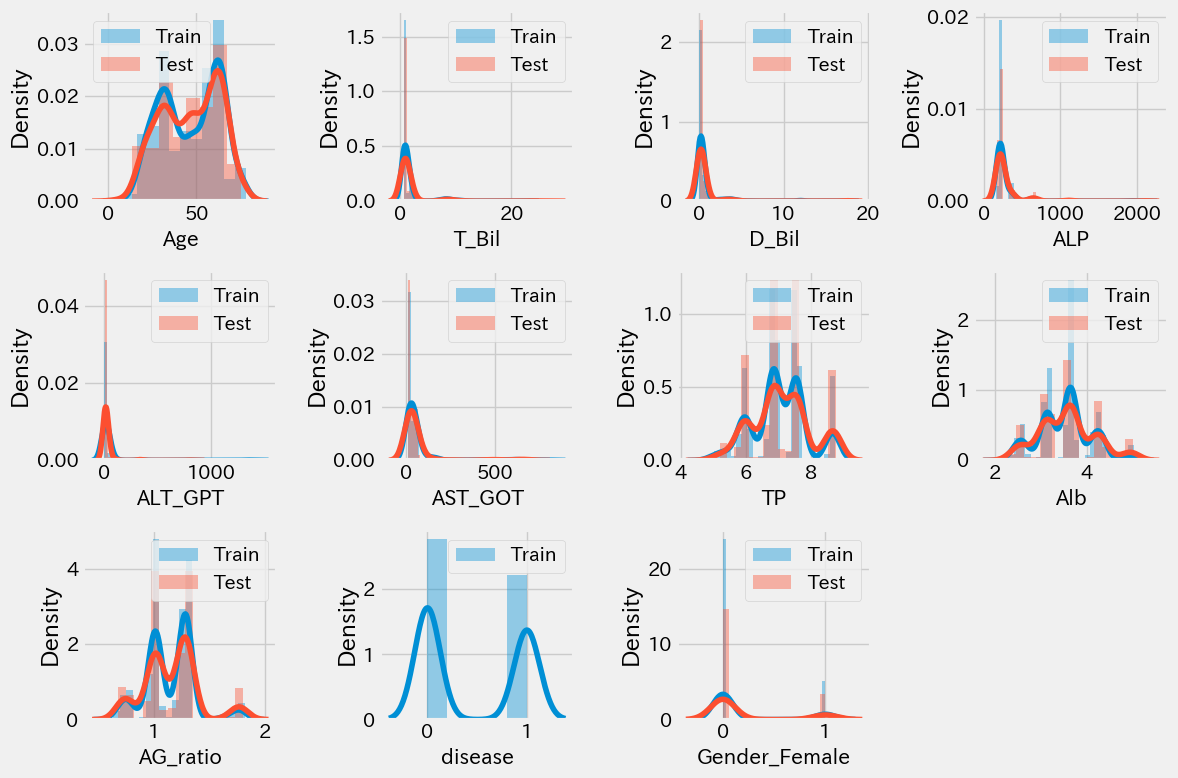

In [34]:
plt.figure(figsize = (12, 8))
plotnumber = 1

for column in train_df.columns:
    ax = plt.subplot(3, 4, plotnumber)
    if column != "disease":
        sns.distplot(train_df[column], label="Train")
        sns.distplot(test_df[column], label="Test")
    else:
        sns.distplot(train_df[column], label="Train") 
    plt.xlabel(column, fontsize = 15)    
    plotnumber += 1
    plt.legend()
plt.tight_layout()
plt.show()

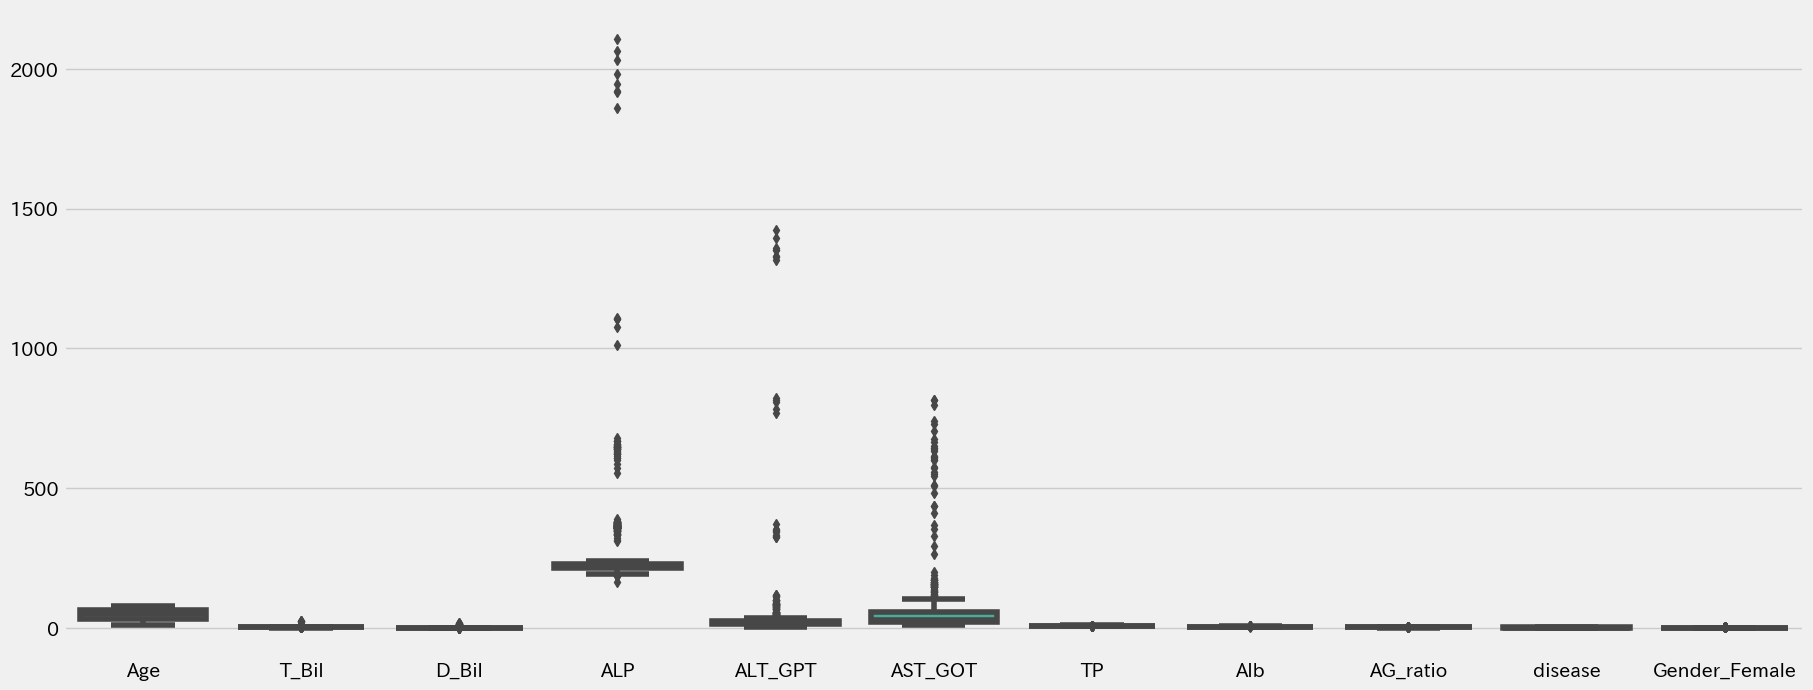

In [35]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = train_df, width = 0.8)
plt.show()

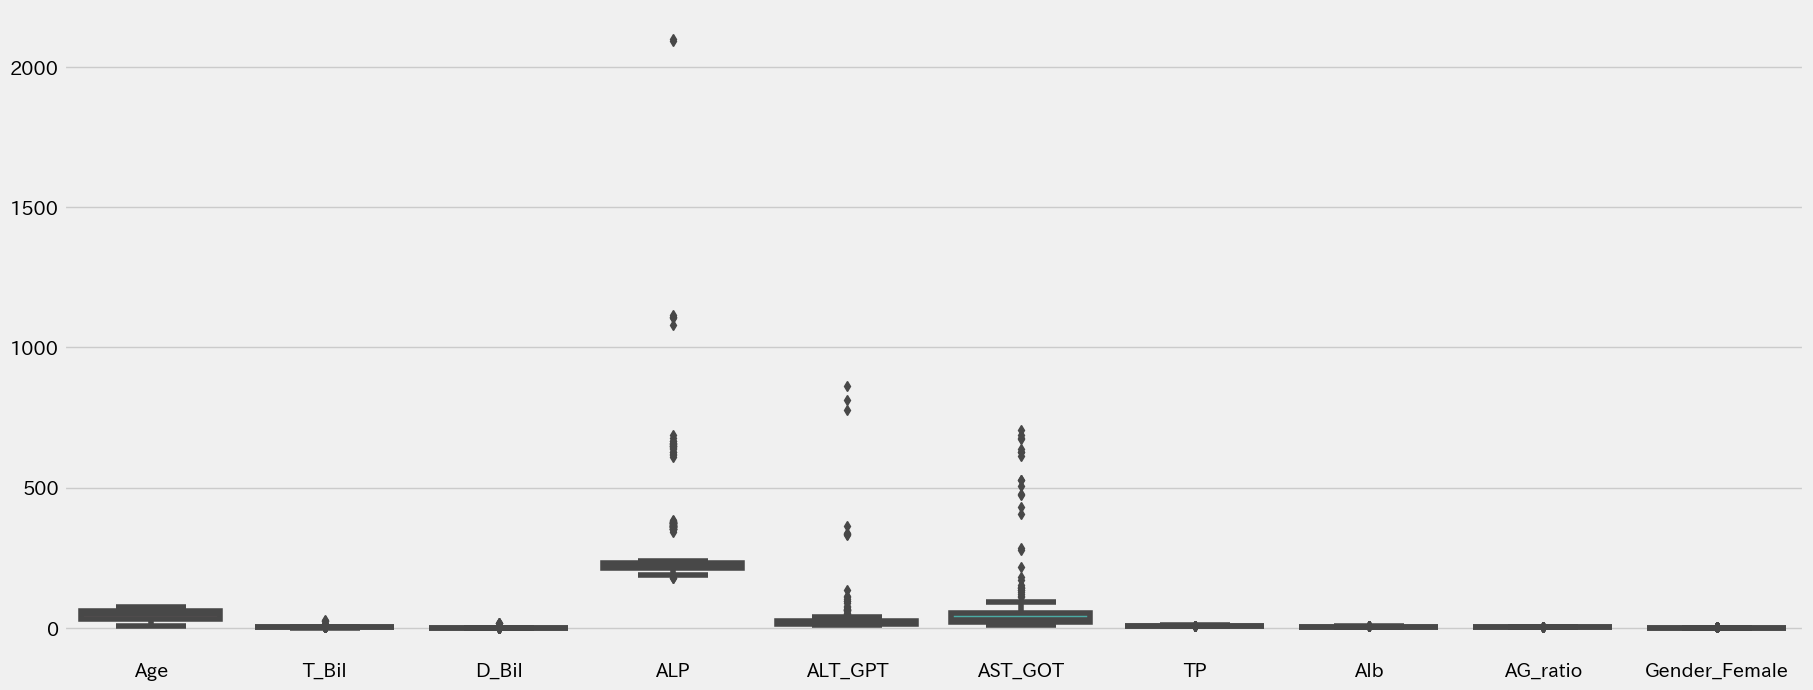

In [36]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = test_df, width = 0.8)
plt.show()

## 前処理

In [40]:
X = train_df.drop(columns="disease")
y = train_df["disease"]

In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_df = pd.DataFrame(data=X_sc, columns=X.columns)

df_sc = pd.concat([X_df, y], axis=1)
train_df_sc = df_sc[:850]
test_df_sc = df_sc[850:].drop(columns="disease")
test_df_sc.reset_index(inplace=True, drop=True)

X = train_df_sc.drop(columns="disease")
y = train_df_sc["disease"]
display(X.head())
display(y.head())

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Female
0,0.753431,-0.335955,-0.290949,-0.259863,-0.195492,-0.356975,-0.257757,-0.724042,-0.606631,-0.459158
1,1.361556,-0.247057,-0.262171,-0.254671,0.062088,0.033929,-0.169826,-0.832608,-1.731472,-0.459158
2,1.118306,-0.389083,-0.335085,0.242516,-0.201270,-0.276256,-1.290839,-1.837506,-1.627531,-0.459158
3,1.118306,-0.286844,-0.250342,0.484775,-0.052323,-0.059131,-0.077493,0.172224,-0.688739,-0.459158
4,-1.496631,0.052258,-0.260844,-0.246862,-0.146773,0.990291,-1.422039,-0.801915,-0.519213,2.177899


0    0
1    1
2    0
3    1
4    0
Name: disease, dtype: int64

In [42]:
#VIFで多重共線性の確認
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_sc, i) for i in range(X_sc.shape[1])]
vif['Features'] = X.columns
vif

,VIF,Features
0,1.023288,Age
1,2.488400,T_Bil
2,2.347733,D_Bil
3,1.055143,ALP
4,1.788898,ALT_GPT
5,1.796286,AST_GOT
6,2.399761,TP
7,3.554137,Alb
8,1.853628,AG_ratio
9,1.033298,Gender_Female


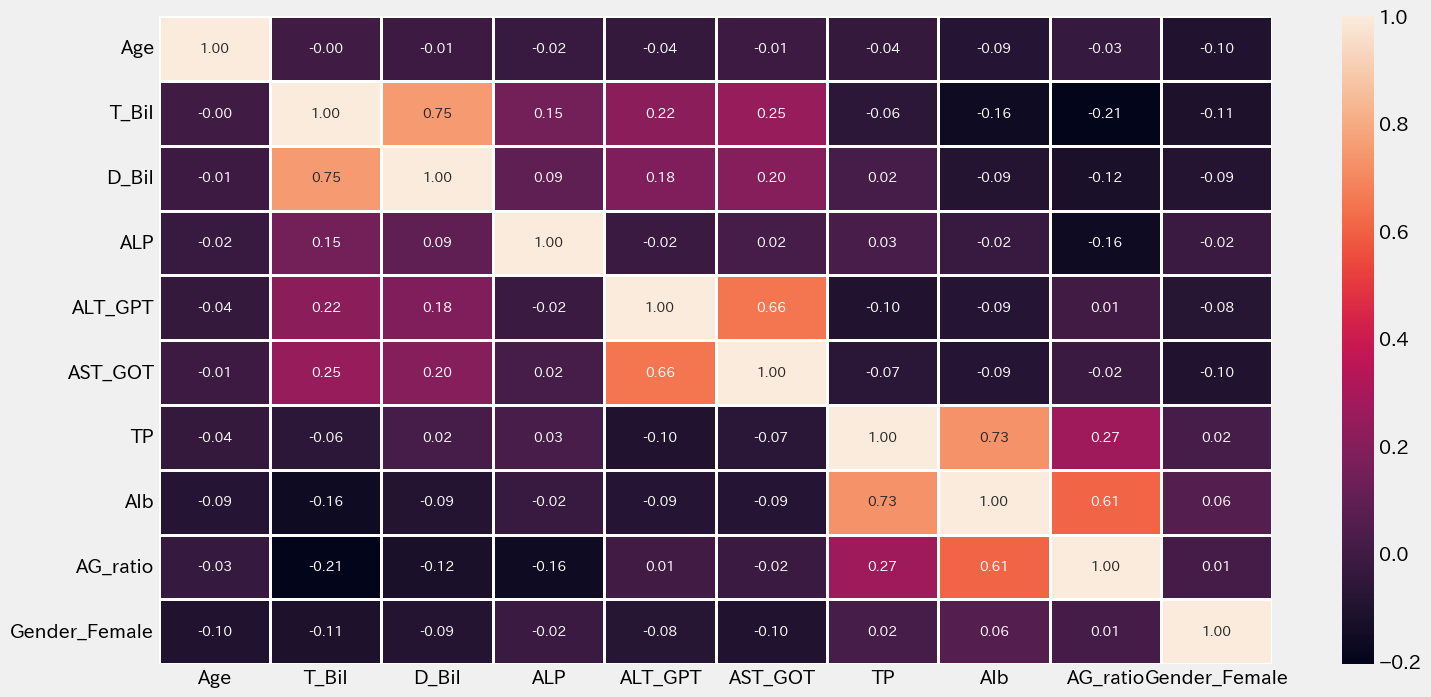

In [43]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(X.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [47]:
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰:警告がでるため「solver='lbfgs'」を与えている
logistic_model = LogisticRegression(solver='lbfgs')
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_valid)

# モデルの評価
print(classification_report(y_valid, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        99
           1       0.87      0.74      0.80        80

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.83      0.83       179



In [48]:
from sklearn.linear_model import Perceptron

# パーセプトロン
perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)
y_pred_perceptron = perceptron_model.predict(X_valid)

# モデルの評価
print(classification_report(y_valid, y_pred_perceptron))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.84      0.68      0.75        80

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [49]:
# 切片
w1 = perceptron_model.intercept_
# 係数
w2 = perceptron_model.coef_[0]
print("w1:", w1, ", w2:", w2)

w1: [4.] , w2: [ 1.97991155 12.84954378  4.2058755   0.622861    8.71736294  1.62437363
 -0.14114968  1.44060738 -2.08209797  0.80042435]


In [54]:
from sklearn.ensemble import RandomForestClassifier

# ランダムフォレスト。n_estimatorsは警告を出さないための指定
randomforest_model = RandomForestClassifier(n_estimators=100)
randomforest_model.fit(X_train, y_train)
y_pred_rondomforest = randomforest_model.predict(X_valid)

# モデルの評価
print(classification_report(y_valid, y_pred_rondomforest))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        99
           1       0.84      0.84      0.84        80

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179



In [64]:
fi = randomforest_model.feature_importances_
#重要度の上位を出力する
idx=np.argsort(fi)[::1]
top_cols,top_importances=X_train.columns.values[idx][:5],fi[idx][:5]
print('randomforestimportance')
print(top_cols,top_importances)

randomforestimportance
['Gender_Female' 'Age' 'Alb' 'TP' 'ALP'] [0.01196194 0.0350067  0.05397891 0.05493761 0.0930051 ]


In [66]:
fi_dict = dict(zip(X_train.columns, fi))
print(fi_dict)

{'Age': 0.035006698650335, 'T_Bil': 0.24795536356660194, 'D_Bil': 0.10501175517546446, 'ALP': 0.09300509822742674, 'ALT_GPT': 0.11668901059961682, 'AST_GOT': 0.1753174518081756, 'TP': 0.054937612783745864, 'Alb': 0.05397890944494359, 'AG_ratio': 0.10613615842794438, 'Gender_Female': 0.01196194131574546}


In [69]:
# 値を降順でソート
sorted_dict = dict(sorted(fi_dict.items(), key=lambda item: item[1], reverse=True))

# ソートされた順番でキーを出力
for key, value in sorted_dict.items():
    print(f"{key} : {value}")

T_Bil : 0.24795536356660194
AST_GOT : 0.1753174518081756
ALT_GPT : 0.11668901059961682
AG_ratio : 0.10613615842794438
D_Bil : 0.10501175517546446
ALP : 0.09300509822742674
TP : 0.054937612783745864
Alb : 0.05397890944494359
Age : 0.035006698650335
Gender_Female : 0.01196194131574546


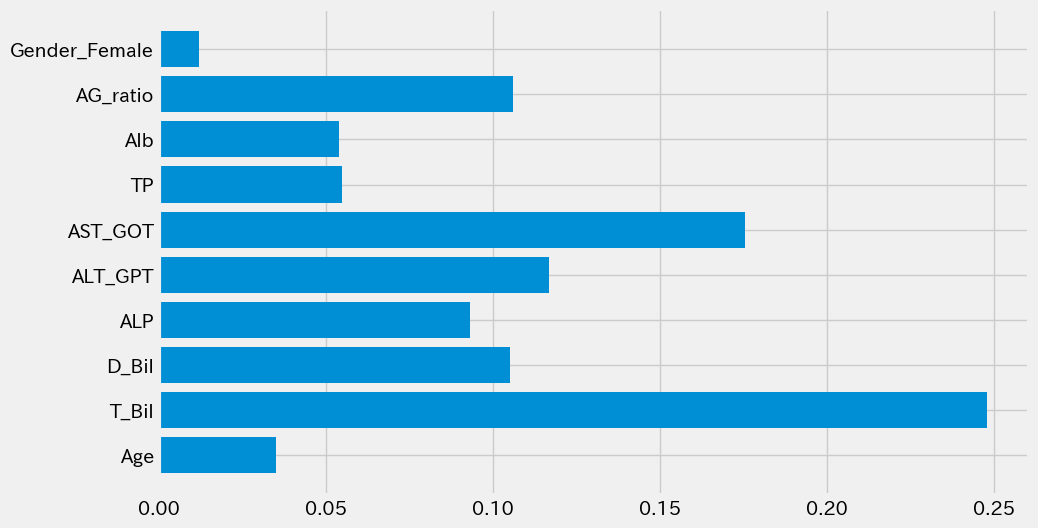

In [71]:
labels = X_train.columns

plt.figure(figsize = (10,6))
plt.barh(y = range(len(fi)), width = fi)
plt.yticks(ticks = range(len(labels)), labels = labels)
plt.show()

In [56]:
df_sc

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Female,disease
0,0.753431,-0.335955,-0.290949,-0.259863,-0.195492,-0.356975,-0.257757,-0.724042,-0.606631,-0.459158,0
1,1.361556,-0.247057,-0.262171,-0.254671,0.062088,0.033929,-0.169826,-0.832608,-1.731472,-0.459158,1
2,1.118306,-0.389083,-0.335085,0.242516,-0.201270,-0.276256,-1.290839,-1.837506,-1.627531,-0.459158,0
3,1.118306,-0.286844,-0.250342,0.484775,-0.052323,-0.059131,-0.077493,0.172224,-0.688739,-0.459158,1
4,-1.496631,0.052258,-0.260844,-0.246862,-0.146773,0.990291,-1.422039,-0.801915,-0.519213,2.177899,0
...,...,...,...,...,...,...,...,...,...,...,...
845,-1.314194,-0.343913,-0.268011,-0.282450,-0.192094,-0.371224,-0.246754,0.187604,0.674411,-0.459158,0
846,0.631806,-0.302763,-0.286804,-0.291669,-0.187972,-0.371573,0.568460,0.181706,0.670500,-0.459158,0
847,0.206119,-0.319617,-0.298346,-0.209115,-0.010171,-0.103554,0.592201,0.369809,-0.693678,-0.459158,1
848,-0.888506,-0.346157,-0.298939,-0.289870,-0.164083,-0.059698,-1.294305,-0.654882,0.335604,2.177899,0


In [57]:
test_sc = sc.fit_transform(test_df)
test_df_sc = pd.DataFrame(data=test_sc, columns=test_df.columns)
display(test_df_sc.head())

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Gender_Female
0,-1.344396,-0.290934,-0.217529,-0.337208,-0.204170,-0.366431,-0.309641,0.064587,0.538259,-0.477567
1,-1.282450,-0.279346,-0.257883,-0.239266,-0.260890,-0.390512,-0.335269,-0.742837,-0.500913,2.093947
2,1.071481,-0.294427,-0.211141,-0.329292,-0.212314,-0.355981,0.495768,0.108888,0.500208,-0.477567
3,1.133427,-0.279646,-0.223870,-0.404602,-0.233300,-0.361151,-0.296859,0.107465,0.486043,-0.477567
4,-0.786886,-0.330015,-0.246944,-0.365776,-0.144261,-0.317630,1.795482,1.004390,0.506257,2.093947


In [58]:
test_pred_rondomforest = randomforest_model.predict(test_df_sc)
print(test_pred_rondomforest.shape)
print(test_pred_rondomforest)

(350,)
[0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0
 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0
 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0
 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1
 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1]


In [59]:
result_rondomforest = pd.DataFrame(data=test_pred_rondomforest)
result_rondomforest = result_rondomforest.astype("int")
result_rondomforest.head()

,0
0,0
1,1
2,0
3,0
4,0


In [61]:
submit_name = "rf"
result_rondomforest.to_csv(f"../result/submit_{submit_name}.csv", header=False)

## 2回目の提出結果
- 評価結果：0.7860215053763441

In [62]:
from sklearn.svm import SVC

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_valid)

# モデルの評価
print(classification_report(y_valid, y_pred_svm))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.77      0.75      0.76        80

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [98]:
#ランダムフォレスト
X_rf2 = X[list(sorted_dict.keys())[:-2]]
display(X_rf2.head())

,T_Bil,AST_GOT,ALT_GPT,AG_ratio,D_Bil,ALP,TP,Alb
0,-0.335955,-0.356975,-0.195492,-0.606631,-0.290949,-0.259863,-0.257757,-0.724042
1,-0.247057,0.033929,0.062088,-1.731472,-0.262171,-0.254671,-0.169826,-0.832608
2,-0.389083,-0.276256,-0.201270,-1.627531,-0.335085,0.242516,-1.290839,-1.837506
3,-0.286844,-0.059131,-0.052323,-0.688739,-0.250342,0.484775,-0.077493,0.172224
4,0.052258,0.990291,-0.146773,-0.519213,-0.260844,-0.246862,-1.422039,-0.801915


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_rf2, y, test_size=0.3, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# ランダムフォレスト。n_estimatorsは警告を出さないための指定
randomforest_model2 = RandomForestClassifier(n_estimators=20)
randomforest_model2.fit(X_train, y_train)
y_pred_rondomforest2 = randomforest_model2.predict(X_valid)

# モデルの評価
print(classification_report(y_valid, y_pred_rondomforest2))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        99
           1       0.85      0.82      0.84        80

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179

